# Objective
The goal of Milestone 3 is to generate code to randomly remove some data to replicate incomplete data, and then determine the accuracy of the coding to determine the opening move with missing data. This code begins by randomly generating the data removed and then applying the pattern recognition framework to assess its accuracy in identifying chess openings from incomplete game records.

*Note: 'test_pattern_recognition_v2.ipynb' contains and utilises training and testing data to complete objective. This code loops around all losses and gives accuracy for all.*

# Step 1: Import Libraries and Setup

This section imports the necessary libraries for data manipulation and visualisation. 

The sys library is used to modify the system path to include the directory where the ChessOpeningMapper module is located.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import zipfile
import os
import numpy as np
import random
from sklearn.model_selection import train_test_split

# Add the path to the directory where ChessOpeningMapper.py is located. I had issues with the path, 
# so I went with the relative path. This will have to change.
sys.path.append(r'../Sprint 2')

# Import ChessOpeningMapper
from ChessOpeningMapper import ChessOpeningMapper

# Step 2: Load Opening Moves and Create Trie Structure.
# 
In this step, an instance of ChessOpeningMapper is created.

A list of file paths to the TSV files containing chess openings is defined.

These TSV files are merged into a single DataFrame using merge_tsv_files.

The PGN strings are split into individual moves using split_pgn_to_columns.

A Trie structure is created from the opening moves using create_trie.

In [3]:
# Create an instance of ChessOpeningMapper
mapper = ChessOpeningMapper()

# Define a list of file paths to the TSV files containing chess openings, I had issues with the path, so I have mapped them manually. 
file_list = [
    r'../Chess Pattern Recognition\a.tsv',
    r'../Chess Pattern Recognition\b.tsv',
    r'../Chess Pattern Recognition\c.tsv',
    r'../Chess Pattern Recognition\d.tsv',
    r'../Chess Pattern Recognition\e.tsv'
]

# Merge the TSV files into a single DataFrame
opening_moves = mapper.merge_tsv_files(file_list)

# Split the PGN strings into individual moves
opening_moves = mapper.split_pgn_to_columns(opening_moves)

# Create a Trie structure from the opening moves
mapper.create_trie(opening_moves)

# Display the first few rows of the opening moves DataFrame
print("Opening Moves DataFrame:")
print(opening_moves.head())

Opening Moves DataFrame:
   eco                                     name  \
0  A00                             Amar Opening   
1  A00               Amar Opening: Paris Gambit   
2  A00  Amar Opening: Paris Gambit, Gent Gambit   
3  A00                         Amsterdam Attack   
4  A00                      Anderssen's Opening   

                                                 pgn Move_ply_1 Move_ply_2  \
0                                             1. Nh3        Nh3       None   
1                           1. Nh3 d5 2. g3 e5 3. f4        Nh3         d5   
2  1. Nh3 d5 2. g3 e5 3. f4 Bxh3 4. Bxh3 exf4 5. ...        Nh3         d5   
3             1. e3 e5 2. c4 d6 3. Nc3 Nc6 4. b3 Nf6         e3         e5   
4                                              1. a3         a3       None   

  Move_ply_3 Move_ply_4 Move_ply_5 Move_ply_6 Move_ply_7  ... Move_ply_28  \
0       None       None       None       None       None  ...        None   
1         g3         e5         f4       None

# Step 3: Unzip and Load Chess Game Data
This step involves:

Defining the path to the zipped game data file.

Unzipping the game data file to extract the CSV file.

Loading the extracted CSV file into a DataFrame.

In [4]:
# Define the path to the zipped game data file
game_data_zip_path = r'../Chess Pattern Recognition\chessdata.zip'

# Define the name of the extracted CSV file
extracted_file_name = 'chessdata.csv'

# Unzip the game data file
ChessOpeningMapper.unzip_game_data(zip_path=game_data_zip_path, extract_to='.')

# Load the extracted CSV file into a DataFrame
game_data = ChessOpeningMapper.load_game_data(zip_path=game_data_zip_path, extracted_file_name=extracted_file_name)

# Display the first few rows of the game data DataFrame
print("Game Data DataFrame:")
print(game_data.head())


c:\Users\jenni\Desktop\jn\uni\capstone 1\Sprint 3\../Sprint 2\ChessOpeningMapper.py:152: DtypeWarning: Columns (188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408) have mixed types. Specify dtype option on import or set low_memory=False.
  game_data = pd.read_csv(extracted_file_name)


Game Data DataFrame:
   Index        Date  ECO                                 Opening Result  \
0      0  2019.04.30  B15                       Caro-Kann Defense    0-1   
1      1  2019.04.30  C50                            Italian Game    0-1   
2      2  2019.04.30  C41                     Philidor Defense #2    1-0   
3      3  2019.04.30  B06                          Modern Defense    0-1   
4      4  2019.04.30  B32  Sicilian Defense: Loewenthal Variation    1-0   

  Termination TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_192  \
0      Normal       300+3  2019.04.30  22:00:24         d4  ...           NaN   
1      Normal       300+0  2019.04.30  22:00:13         e4  ...           NaN   
2      Normal       600+0  2019.04.30  22:00:41         e4  ...           NaN   
3      Normal        60+0  2019.04.30  22:00:43         e4  ...           NaN   
4      Normal       180+0  2019.04.30  22:00:46         e4  ...           NaN   

  Clock_ply_193 Clock_ply_194 Clock

# Step 4: Map Opening Names to Game Data

Here:

The game data is processed to map the move sequences to opening names using get_opening_name_from_game.

The mapped opening names are added to the original game data DataFrame in a new column called mapped_opening.


In [5]:
# Map the opening names to the game data
result_df = mapper.get_opening_name_from_game(game_data)

# Add the mapped opening names to the original game data DataFrame
game_data['mapped_opening'] = result_df['opening_name']

# Display the first 5 rows of the updated game data DataFrame
print(f"First 5 rows with mapped openings: \n{game_data.head()}")

First 5 rows with mapped openings: 
   Index        Date  ECO                                 Opening Result  \
0      0  2019.04.30  B15                       Caro-Kann Defense    0-1   
1      1  2019.04.30  C50                            Italian Game    0-1   
2      2  2019.04.30  C41                     Philidor Defense #2    1-0   
3      3  2019.04.30  B06                          Modern Defense    0-1   
4      4  2019.04.30  B32  Sicilian Defense: Loewenthal Variation    1-0   

  Termination TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_193  \
0      Normal       300+3  2019.04.30  22:00:24         d4  ...           NaN   
1      Normal       300+0  2019.04.30  22:00:13         e4  ...           NaN   
2      Normal       600+0  2019.04.30  22:00:41         e4  ...           NaN   
3      Normal        60+0  2019.04.30  22:00:43         e4  ...           NaN   
4      Normal       180+0  2019.04.30  22:00:46         e4  ...           NaN   

  Clock_ply_194 Cloc

# Step 5: Train/Test Split

Here: 

Split the dataset into training and test sets with a 70/30 ratio. Display the sizes of the train and test datasets to verify the split.

In [6]:
# Step 4: Train/Test Split
# Split the dataset into training and test sets (70/30)
train_df, test_df = train_test_split(game_data, test_size=0.3, random_state=42)

# Display the sizes of the train and test datasets
print(f"Training data size: {len(train_df)}")
print(f"Testing data size: {len(test_df)}")

Training data size: 140000
Testing data size: 60000


# Step 6: Generate Random Code

Here:

- Define the number of loss values
- Randomly select a number of variables depending on the loss values 
- Rename the random values as move_ply_xx and then drop 


In [7]:
# Generate Random Code and Apply to Both Datasets
def generate_random_move_removal(data, losses=[1, 2, 3, 4, 5, 10, 15, 20, 25, 30]):
    loss_dict = {}
    modified_datasets = []
    
    # select a number of variables based on the number of rows lossed, 
    # between 0 and 36 to determine which rows to randomly drop
    #### Note- 36 was determined as the longest opening move in the dataset
    for loss in losses:
        random_moves = random.sample(range(1, 36), loss)
        loss_dict[f'loss{loss}'] = random_moves
        
        modified_data = data.copy()

        # set loop to make selected values from above to None 
        drop_columns = {f'Move_ply_{i}' for i in random_moves}
        for i in drop_columns:
            modified_data[i] = None
            
        modified_datasets.append(modified_data)
    
    return modified_datasets, loss_dict

# Apply random move removal to training and testing datasets for all losses
train_datasets, train_loss_dict = generate_random_move_removal(train_df)
test_datasets, test_loss_dict = generate_random_move_removal(test_df)

print("Sample of training data after random move removal:")
print(train_df.head())

print("Sample of testing data after random move removal:")
print(test_df.head())

# test example of the loss 3 rows to remove
print("Random moves removed from training data (loss3):", train_loss_dict['loss3'])
print("Random moves removed from testing data (loss3):", test_loss_dict['loss3'])

Sample of training data after random move removal:
         Index        Date  ECO  \
21269    21269  2019.05.25  A43   
187660  187660  2019.05.20  B32   
774        774  2019.05.01  A04   
184577  184577  2019.05.20  B30   
37127    37127  2019.05.28  D06   

                                                  Opening Result Termination  \
21269               Benoni Defense: Benoni-Indian Defense    0-1      Normal   
187660             Sicilian Defense: Loewenthal Variation    1-0      Normal   
774                Zukertort Opening: Kingside Fianchetto    1-0      Normal   
184577                     Sicilian Defense: Old Sicilian    1-0      Normal   
37127   Queen's Gambit Refused: Marshall Defense, Tan ...    1-0      Normal   

       TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_193  \
21269       900+15  2019.05.25  20:25:43         d4  ...           NaN   
187660       300+3  2019.05.20  21:48:48         e4  ...           NaN   
774          300+0  2019.05.01   1:

In [21]:
# setting loss rows to 1, 2, 3 etc
#loss = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]
#index = 0

# select a number of variables based on the number of rows lossed, 
# between 0 and 36 to determine which rows to randomly drop
#### Note- 36 was determined as the longest opening move in the dataset
#while index < len(loss):
 #   globals()['loss%s' % loss[index]] = random.sample(range(1, 36), loss[index])
  #  index += 1

# test example of the loss 3 rows to remove
#print(loss3)


In [22]:
# set loop to make selected values from above to None 
#drop_columns3 = {f'Move_ply_{i}' for i in loss3}
#game_data3 = game_data
#for i in drop_columns3:
#    game_data3[i] = None

# test sample for 3 rows loss 
#print(game_data3)

# Step 7: Prepare Data for Testing

In this step, game data is processed to create sequences from non-null moves, preparing it for pattern recognition testing. This step ensures each game's moves are consolidated into a format suitable for analysis.

In [8]:
# Prepare data by creating move sequences from non-null moves
def prepare_game_data_for_testing(game_data, max_plies=200):
    
    """
    Prepare the game data by creating move sequences from non-null moves.
    
    Args:
    - game_data (pd.DataFrame): The DataFrame with chess moves.
    - max_plies (int): The maximum number of plies to consider (default is 200).
    
    Returns:
    - pd.DataFrame: A DataFrame with a new column 'move_sequence' containing sequences of moves.
    """
    
    move_columns = [f'Move_ply_{i+1}' for i in range(max_plies)]
    selected_moves_df = game_data[move_columns].copy()

    def create_move_sequence(row):
        moves = row.dropna().tolist()  # Drop NaN values and convert to list
        return ' '.join(moves)

    selected_moves_df['move_sequence'] = selected_moves_df.apply(create_move_sequence, axis=1)
    selected_moves_df['mapped_opening'] = game_data['mapped_opening']  # Ensure this column exists
    return selected_moves_df

# Prepare the incomplete game data for testing
# For simplicity, let's use the first modified dataset for further processing
processed_train_data_sample = prepare_game_data_for_testing(train_datasets[0])
processed_test_data_sample = prepare_game_data_for_testing(test_datasets[0])

# Step 8: Test Pattern Recognition on Incomplete Data

In this step, the ChessOpeningMapper is used to predict chess openings from the processed, incomplete data. The predicted openings are then compared with the actual mapped openings to determine the accuracy of the model, assessing its ability to handle missing data.

In [9]:
# Test pattern recognition on incomplete data
def test_pattern_recognition_on_incomplete_data(mapper, incomplete_df, dataset_label):
    
    """
    Test the pattern recognition on incomplete data using ChessOpeningMapper.
    
    Args:
    - mapper (ChessOpeningMapper): The ChessOpeningMapper instance for mapping openings.
    - incomplete_df (pd.DataFrame): The DataFrame containing incomplete chess move data.
    - dataset_label (str): Label to indicate which dataset is being tested (e.g., 'Training' or 'Testing').
    
    Returns:
    - pd.DataFrame: A DataFrame with the original and predicted openings for comparison.
    """
    
    # Use the mapper to predict openings based on incomplete data
    incomplete_results = mapper.get_opening_name_from_game(incomplete_df)
    incomplete_df['predicted_opening'] = incomplete_results['opening_name']
    
    if 'mapped_opening' in incomplete_df.columns:
        incomplete_df['match'] = incomplete_df['mapped_opening'] == incomplete_df['predicted_opening']
        accuracy = incomplete_df['match'].mean()
        print(f'Accuracy on incomplete {dataset_label} data: {accuracy:.2%}')
    else:
        print(f"No 'mapped_opening' column found in input {dataset_label} data")
    
    return incomplete_df

# Instantiate ChessOpeningMapper and load trie
mapper = ChessOpeningMapper()
opening_moves = mapper.load_openings()
mapper.create_trie(opening_moves)

# Run the test on both training and testing data
train_result_df_test = test_pattern_recognition_on_incomplete_data(mapper, processed_train_data_sample, "training")
test_result_df_test = test_pattern_recognition_on_incomplete_data(mapper, processed_test_data_sample, "testing")


# Print results for training data
#print("\nTraining Data Results:")
#print("-" * 50)
#if 'mapped_opening' in train_result_df.columns and 'match' in train_result_df.columns:
 #   print(train_result_df[['mapped_opening', 'predicted_opening', 'match']].head())
#else:
#    print("Mapped or Match columns not found in the train result DataFrame")

Accuracy on incomplete training data: 99.97%
Accuracy on incomplete testing data: 99.99%


In [10]:
# Test pattern recognition on all losses for both train and test datasets

# Initialise a dictionary to store results for each loss scenario
results = {}

# Loop through each loss scenario in the training loss dictionary
# `train_loss_dict.keys()` contains keys like 'loss1', 'loss2', ..., 'loss30'
for idx, loss in enumerate(train_loss_dict.keys()):
    
    # Prepare the training data by creating sequences of moves for the current loss scenario
    # `train_datasets[idx]` contains the modified training dataset for the current loss
    processed_train_data = prepare_game_data_for_testing(train_datasets[idx])

    # Prepare the testing data by creating sequences of moves for the current loss scenario
    # `test_datasets[idx]` contains the modified testing dataset for the current loss
    processed_test_data = prepare_game_data_for_testing(test_datasets[idx])
    
    # Test pattern recognition on the processed training data for the current loss
    # This function will predict the openings and compare with actual mapped openings
    train_result_df = test_pattern_recognition_on_incomplete_data(mapper, processed_train_data, f"training ({loss})")

    # Test pattern recognition on the processed testing data for the current loss
    test_result_df = test_pattern_recognition_on_incomplete_data(mapper, processed_test_data, f"testing ({loss})")
    
    # Store the result dataframes (train and test) in the results dictionary under the current loss key
    results[loss] = {
        'train': train_result_df, # Result DataFrame for training data
        'test': test_result_df # Result DataFrame for testing data
    }

Accuracy on incomplete training (loss1) data: 99.97%
Accuracy on incomplete testing (loss1) data: 99.99%
Accuracy on incomplete training (loss2) data: 8.91%
Accuracy on incomplete testing (loss2) data: 30.27%
Accuracy on incomplete training (loss3) data: 99.41%
Accuracy on incomplete testing (loss3) data: 99.91%
Accuracy on incomplete training (loss4) data: 66.95%
Accuracy on incomplete testing (loss4) data: 0.00%
Accuracy on incomplete training (loss5) data: 98.07%
Accuracy on incomplete testing (loss5) data: 67.45%
Accuracy on incomplete training (loss10) data: 49.15%
Accuracy on incomplete testing (loss10) data: 67.45%
Accuracy on incomplete training (loss15) data: 0.00%
Accuracy on incomplete testing (loss15) data: 30.27%
Accuracy on incomplete training (loss20) data: 0.00%
Accuracy on incomplete testing (loss20) data: 5.88%
Accuracy on incomplete training (loss25) data: 0.00%
Accuracy on incomplete testing (loss25) data: 0.00%
Accuracy on incomplete training (loss30) data: 0.00%
A

# Step 9: Convert 'results' dictionary to DataFrame, and 'results_df' DataFrame to Dictionary

In this step, the 'results' dictionary, which contains the results of the chess pattern recognition tests for different loss scenarios, is converted into a Pandas DataFrame for easier manipulation and visualisation. This conversion allows for a seamless integration with visualisation tools that require tabular data formats, such as KNIME.

After processing or visualisation, the DataFrame can be converted back into the original dictionary format, preserving the structure and relationships between the training and testing datasets for each loss scenario. This bidirectional conversion between the dictionary and DataFrame formats ensures flexibility in data handling and integration with various tools and workflows.

In [14]:
# Function to convert the 'results' dictionary to a DataFrame
def results_dict_to_dataframe(results_dict):
    
    """
    Converts a dictionary of results into a single Pandas DataFrame.
    
    Args:
        results_dict (dict): A dictionary where each key is a loss scenario, 
                             and the value is another dictionary with 'train' 
                             and 'test' DataFrames.
    
    Returns:
        pd.DataFrame: A DataFrame combining all the training and testing results, 
                      with additional columns for 'type' (train/test) and 'loss'.
    """

    dataframes = []  # List to store individual DataFrames
    
    # Iterate over each loss scenario in the results dictionary
    for loss, result in results_dict.items():
        
        # Process training DataFrame
        train_df = result['train']
        train_df['type'] = 'train'  # Add a column to identify this as training data
        train_df['loss'] = loss  # Add a column to store the loss scenario
        dataframes.append(train_df)  # Append the modified DataFrame to the list
        
        # Process testing DataFrame
        test_df = result['test']
        test_df['type'] = 'test'  # Add a column to identify this as testing data
        test_df['loss'] = loss  # Add a column to store the loss scenario
        dataframes.append(test_df)  # Append the modified DataFrame to the list
    
    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df  # Return the combined DataFrame

In [15]:
# Convert the 'results' dictionary to a DataFrame
results_df = results_dict_to_dataframe(results)
print("Results DataFrame:")
print(results_df.head())  # Display the first few rows of the resulting DataFrame

Results DataFrame:
  Move_ply_1 Move_ply_2 Move_ply_3 Move_ply_4 Move_ply_5 Move_ply_6  \
0         d4         c5         d5        Nf6        Bf4         g6   
1         e4         c5        Nf3        Nc6         d4       cxd4   
2        Nf3         g6         e4        Bg7        Bc4         e6   
3         e4         c5        Nf3        Nc6        Bc4         e6   
4         d4         d5         c4        Nf6       cxd5         c6   

  Move_ply_7 Move_ply_8 Move_ply_9 Move_ply_10  ... Move_ply_197 Move_ply_198  \
0        Nc3        Bg7         e4          d6  ...          NaN          NaN   
1       Nxd4         e5        Nf3          d6  ...          NaN          NaN   
2        O-O         a5         c3          c6  ...          NaN          NaN   
3         c3         d5       exd5        exd5  ...          NaN          NaN   
4       dxc6       Nxc6        Nf3          e6  ...          NaN          NaN   

  Move_ply_199 Move_ply_200  \
0          NaN          NaN   
1    

In [16]:
# Function to convert a DataFrame back into the 'results' dictionary
def dataframe_to_results_dict(df):
   
    """
    Converts a DataFrame back into the original results dictionary format.
    
    Args:
        df (pd.DataFrame): A DataFrame with columns 'type' (train/test) and 'loss', 
                           representing the combined results from multiple loss scenarios.
    
    Returns:
        dict: A dictionary where each key is a loss scenario, 
              and the value is another dictionary with 'train' and 'test' DataFrames.
    """
   
    results_dict = {}  # Dictionary to store the results
    
    # Group the DataFrame by the 'loss' column to separate different loss scenarios
    grouped = df.groupby('loss')
    
    # Iterate over each group, corresponding to a different loss scenario
    for loss, group in grouped:
        
        # Separate the group into training and testing DataFrames
        train_df = group[group['type'] == 'train'].drop(columns=['type', 'loss'])  # Drop 'type' and 'loss' columns
        test_df = group[group['type'] == 'test'].drop(columns=['type', 'loss'])  # Drop 'type' and 'loss' columns
        
        # Store the separated DataFrames back into the results dictionary
        results_dict[loss] = {
            'train': train_df,
            'test': test_df
        }
    
    return results_dict  # Return the reconstructed results dictionary

In [17]:
# Convert the DataFrame back to the original 'results' dictionary format
converted_results = dataframe_to_results_dict(results_df)

# To inspect the dictionary, you can do the following:
# Print the keys to see the available loss scenarios
print("Keys in the converted results dictionary:", list(converted_results.keys()))

# Print the first few rows of a specific 'train' DataFrame for one loss scenario
first_loss_key = list(converted_results.keys())[0]
print(f"\nFirst few rows of 'train' DataFrame for loss scenario '{first_loss_key}':")
print(converted_results[first_loss_key]['train'].head())

# Similarly, you can inspect the 'test' DataFrame
print(f"\nFirst few rows of 'test' DataFrame for loss scenario '{first_loss_key}':")
print(converted_results[first_loss_key]['test'].head())

Keys in the converted results dictionary: ['loss1', 'loss10', 'loss15', 'loss2', 'loss20', 'loss25', 'loss3', 'loss30', 'loss4', 'loss5']

First few rows of 'train' DataFrame for loss scenario 'loss1':
  Move_ply_1 Move_ply_2 Move_ply_3 Move_ply_4 Move_ply_5 Move_ply_6  \
0         d4         c5         d5        Nf6        Bf4         g6   
1         e4         c5        Nf3        Nc6         d4       cxd4   
2        Nf3         g6         e4        Bg7        Bc4         e6   
3         e4         c5        Nf3        Nc6        Bc4         e6   
4         d4         d5         c4        Nf6       cxd5         c6   

  Move_ply_7 Move_ply_8 Move_ply_9 Move_ply_10  ... Move_ply_195 Move_ply_196  \
0        Nc3        Bg7         e4          d6  ...          NaN          NaN   
1       Nxd4         e5        Nf3          d6  ...          NaN          NaN   
2        O-O         a5         c3          c6  ...          NaN          NaN   
3         c3         d5       exd5        exd5 

# Step 10: Visualise Pattern Recognition Results

In this step, the accuracy of pattern recognition on incomplete data is visualised. A count plot is generated to show the distribution of matches and mismatches between the predicted and actual chess openings, providing insight into the model's performance.

Results for loss1:

Training Data Results:
                                           mapped_opening  \
21269               Benoni Defense: Benoni-Indian Defense   
187660              Sicilian Defense: Löwenthal Variation   
774                Zukertort Opening: Kingside Fianchetto   
184577                     Sicilian Defense: Old Sicilian   
37127   Queen's Gambit Declined: Marshall Defense, Tan...   

                                        predicted_opening  match  
21269               Benoni Defense: Benoni-Indian Defense   True  
187660              Sicilian Defense: Löwenthal Variation   True  
774                Zukertort Opening: Kingside Fianchetto   True  
184577                     Sicilian Defense: Old Sicilian   True  
37127   Queen's Gambit Declined: Marshall Defense, Tan...   True  

Testing Data Results:
                               mapped_opening  \
119737      French Defense: Paulsen Variation   
72272   Sicilian Defense: Löwenthal Variation   
158154      Queen'

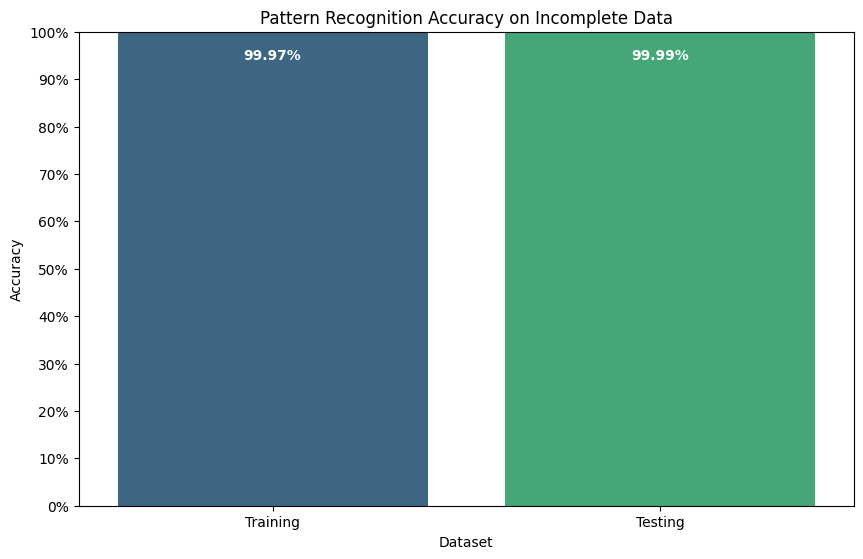

Results for loss2:

Training Data Results:
                                           mapped_opening  predicted_opening  \
21269               Benoni Defense: Benoni-Indian Defense  Queen's Pawn Game   
187660              Sicilian Defense: Löwenthal Variation   King's Pawn Game   
774                Zukertort Opening: Kingside Fianchetto  Zukertort Opening   
184577                     Sicilian Defense: Old Sicilian   King's Pawn Game   
37127   Queen's Gambit Declined: Marshall Defense, Tan...  Queen's Pawn Game   

        match  
21269   False  
187660  False  
774     False  
184577  False  
37127   False  

Testing Data Results:
                               mapped_opening  \
119737      French Defense: Paulsen Variation   
72272   Sicilian Defense: Löwenthal Variation   
158154      Queen's Pawn Game: Modern Defense   
65426                          Indian Defense   
30074             Ruy Lopez: Steinitz Defense   

                        predicted_opening  match  
119737     

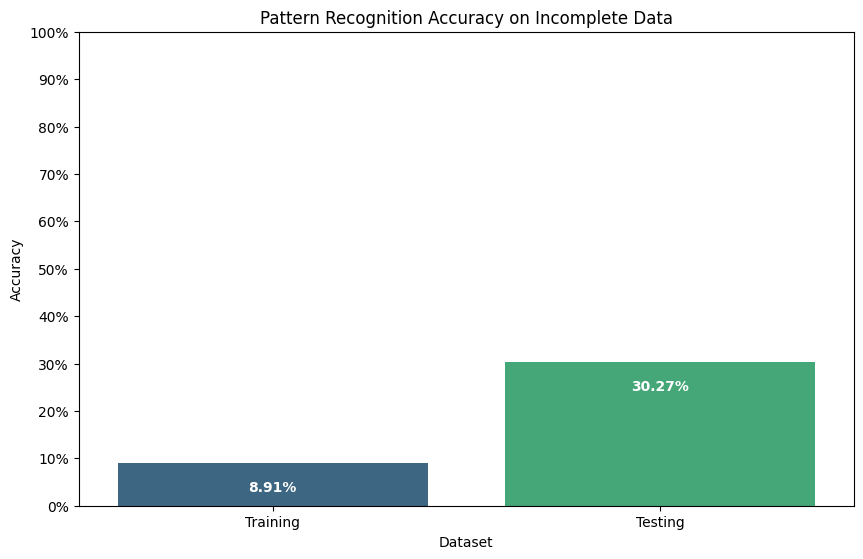

Results for loss3:

Training Data Results:
                                           mapped_opening  \
21269               Benoni Defense: Benoni-Indian Defense   
187660              Sicilian Defense: Löwenthal Variation   
774                Zukertort Opening: Kingside Fianchetto   
184577                     Sicilian Defense: Old Sicilian   
37127   Queen's Gambit Declined: Marshall Defense, Tan...   

                                        predicted_opening  match  
21269               Benoni Defense: Benoni-Indian Defense   True  
187660              Sicilian Defense: Löwenthal Variation   True  
774                Zukertort Opening: Kingside Fianchetto   True  
184577                     Sicilian Defense: Old Sicilian   True  
37127   Queen's Gambit Declined: Marshall Defense, Tan...   True  

Testing Data Results:
                               mapped_opening  \
119737      French Defense: Paulsen Variation   
72272   Sicilian Defense: Löwenthal Variation   
158154      Queen'

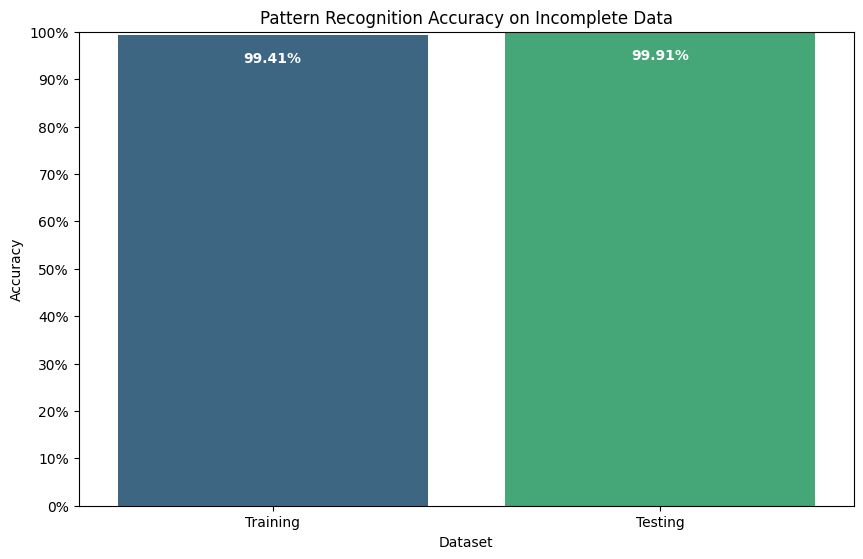

Results for loss4:

Training Data Results:
                                           mapped_opening  \
21269               Benoni Defense: Benoni-Indian Defense   
187660              Sicilian Defense: Löwenthal Variation   
774                Zukertort Opening: Kingside Fianchetto   
184577                     Sicilian Defense: Old Sicilian   
37127   Queen's Gambit Declined: Marshall Defense, Tan...   

                                predicted_opening  match  
21269       Benoni Defense: Benoni-Indian Defense   True  
187660             Sicilian Defense: Old Sicilian  False  
774        Zukertort Opening: Kingside Fianchetto   True  
184577             Sicilian Defense: Old Sicilian   True  
37127   Queen's Gambit Declined: Marshall Defense  False  

Testing Data Results:
                               mapped_opening  \
119737      French Defense: Paulsen Variation   
72272   Sicilian Defense: Löwenthal Variation   
158154      Queen's Pawn Game: Modern Defense   
65426            

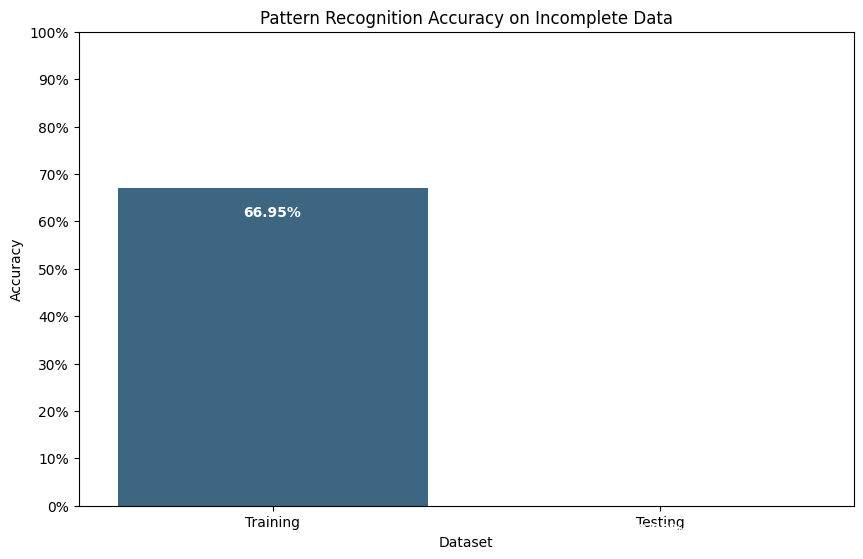

Results for loss5:

Training Data Results:
                                           mapped_opening  \
21269               Benoni Defense: Benoni-Indian Defense   
187660              Sicilian Defense: Löwenthal Variation   
774                Zukertort Opening: Kingside Fianchetto   
184577                     Sicilian Defense: Old Sicilian   
37127   Queen's Gambit Declined: Marshall Defense, Tan...   

                                        predicted_opening  match  
21269               Benoni Defense: Benoni-Indian Defense   True  
187660              Sicilian Defense: Löwenthal Variation   True  
774                Zukertort Opening: Kingside Fianchetto   True  
184577                     Sicilian Defense: Old Sicilian   True  
37127   Queen's Gambit Declined: Marshall Defense, Tan...   True  

Testing Data Results:
                               mapped_opening  \
119737      French Defense: Paulsen Variation   
72272   Sicilian Defense: Löwenthal Variation   
158154      Queen'

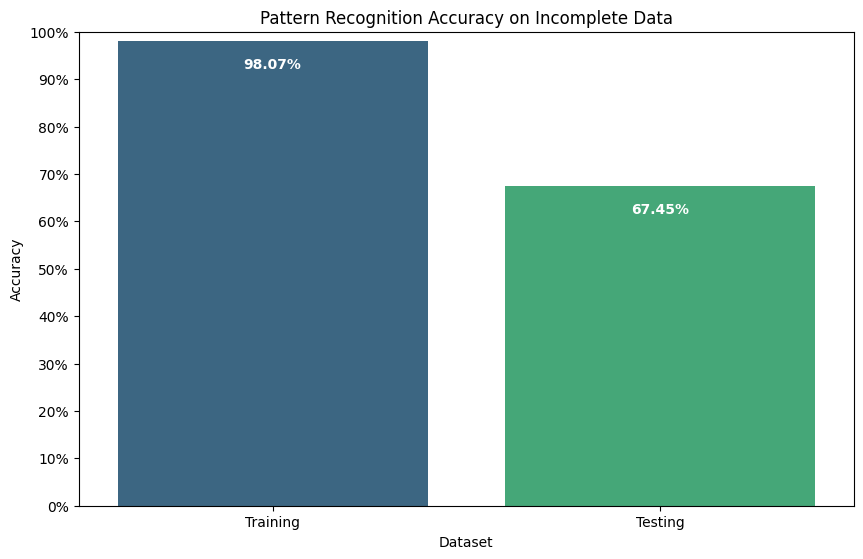

Results for loss10:

Training Data Results:
                                           mapped_opening  \
21269               Benoni Defense: Benoni-Indian Defense   
187660              Sicilian Defense: Löwenthal Variation   
774                Zukertort Opening: Kingside Fianchetto   
184577                     Sicilian Defense: Old Sicilian   
37127   Queen's Gambit Declined: Marshall Defense, Tan...   

                             predicted_opening  match  
21269               Benoni Defense: Old Benoni  False  
187660                        Sicilian Defense  False  
774     Zukertort Opening: Kingside Fianchetto   True  
184577                        Sicilian Defense  False  
37127                           Queen's Gambit  False  

Testing Data Results:
                               mapped_opening  \
119737      French Defense: Paulsen Variation   
72272   Sicilian Defense: Löwenthal Variation   
158154      Queen's Pawn Game: Modern Defense   
65426                          Ind

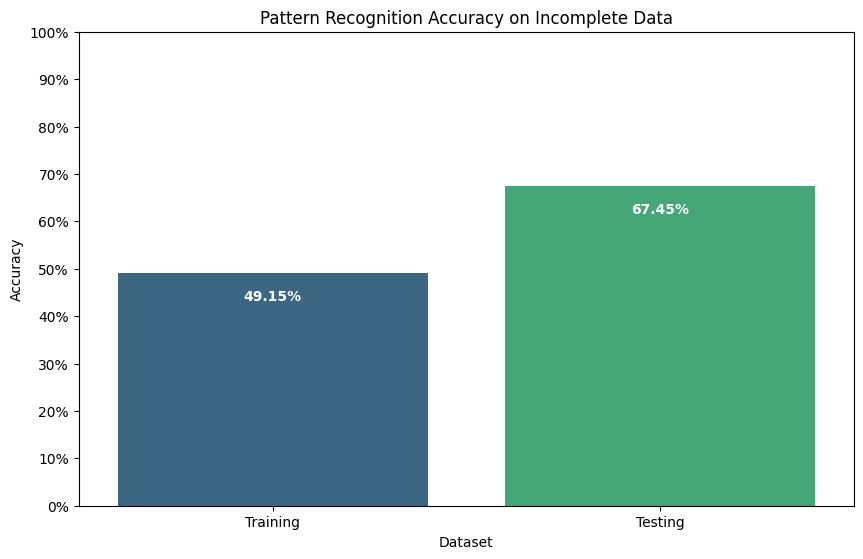

Results for loss15:

Training Data Results:
                                           mapped_opening predicted_opening  \
21269               Benoni Defense: Benoni-Indian Defense   Unknown Opening   
187660              Sicilian Defense: Löwenthal Variation   Unknown Opening   
774                Zukertort Opening: Kingside Fianchetto   Unknown Opening   
184577                     Sicilian Defense: Old Sicilian   Unknown Opening   
37127   Queen's Gambit Declined: Marshall Defense, Tan...   Unknown Opening   

        match  
21269   False  
187660  False  
774     False  
184577  False  
37127   False  

Testing Data Results:
                               mapped_opening  \
119737      French Defense: Paulsen Variation   
72272   Sicilian Defense: Löwenthal Variation   
158154      Queen's Pawn Game: Modern Defense   
65426                          Indian Defense   
30074             Ruy Lopez: Steinitz Defense   

                        predicted_opening  match  
119737          

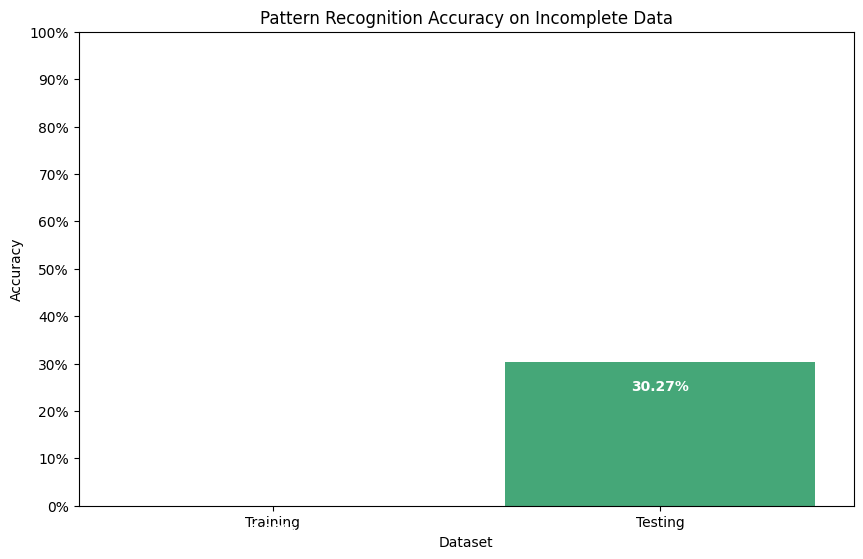

Results for loss20:

Training Data Results:
                                           mapped_opening predicted_opening  \
21269               Benoni Defense: Benoni-Indian Defense   Unknown Opening   
187660              Sicilian Defense: Löwenthal Variation   Unknown Opening   
774                Zukertort Opening: Kingside Fianchetto   Unknown Opening   
184577                     Sicilian Defense: Old Sicilian   Unknown Opening   
37127   Queen's Gambit Declined: Marshall Defense, Tan...   Unknown Opening   

        match  
21269   False  
187660  False  
774     False  
184577  False  
37127   False  

Testing Data Results:
                               mapped_opening     predicted_opening  match
119737      French Defense: Paulsen Variation  Scandinavian Defense  False
72272   Sicilian Defense: Löwenthal Variation   Nimzowitsch Defense  False
158154      Queen's Pawn Game: Modern Defense     Queen's Pawn Game  False
65426                          Indian Defense     Queen's Pawn

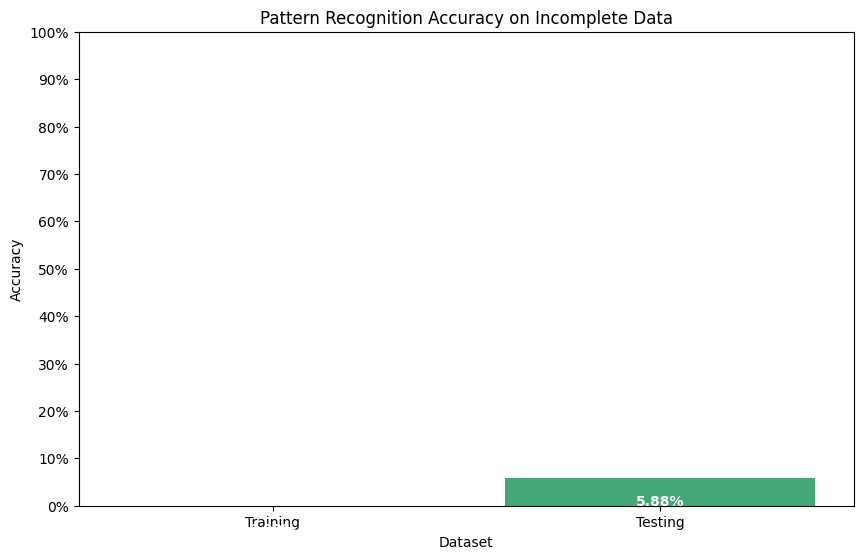

Results for loss25:

Training Data Results:
                                           mapped_opening predicted_opening  \
21269               Benoni Defense: Benoni-Indian Defense   Unknown Opening   
187660              Sicilian Defense: Löwenthal Variation   Unknown Opening   
774                Zukertort Opening: Kingside Fianchetto   Unknown Opening   
184577                     Sicilian Defense: Old Sicilian   Unknown Opening   
37127   Queen's Gambit Declined: Marshall Defense, Tan...   Unknown Opening   

        match  
21269   False  
187660  False  
774     False  
184577  False  
37127   False  

Testing Data Results:
                               mapped_opening  predicted_opening  match
119737      French Defense: Paulsen Variation  Queen's Pawn Game  False
72272   Sicilian Defense: Löwenthal Variation  Zukertort Opening  False
158154      Queen's Pawn Game: Modern Defense   King's Pawn Game  False
65426                          Indian Defense   Van Geet Opening  False
30

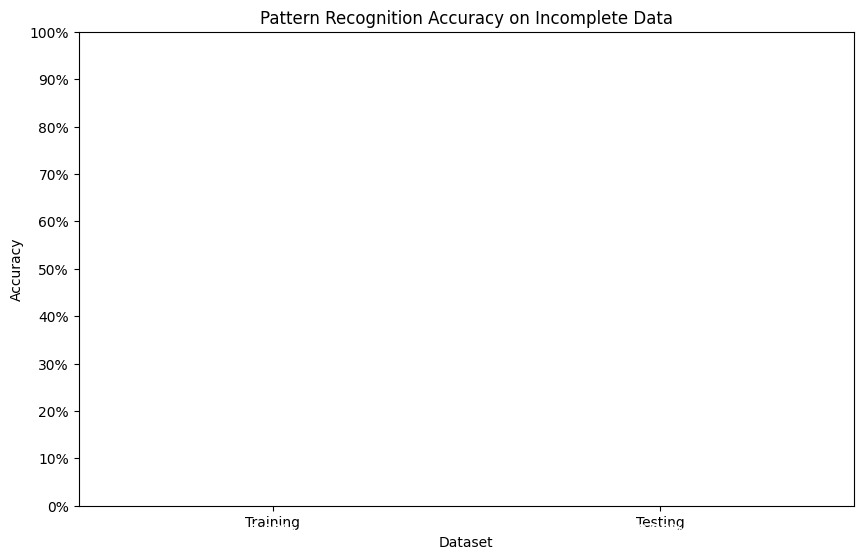

Results for loss30:

Training Data Results:
                                           mapped_opening  predicted_opening  \
21269               Benoni Defense: Benoni-Indian Defense   King's Pawn Game   
187660              Sicilian Defense: Löwenthal Variation  Zukertort Opening   
774                Zukertort Opening: Kingside Fianchetto  Saragossa Opening   
184577                     Sicilian Defense: Old Sicilian    Unknown Opening   
37127   Queen's Gambit Declined: Marshall Defense, Tan...  Zukertort Opening   

        match  
21269   False  
187660  False  
774     False  
184577  False  
37127   False  

Testing Data Results:
                               mapped_opening  predicted_opening  match
119737      French Defense: Paulsen Variation  Queen's Pawn Game  False
72272   Sicilian Defense: Löwenthal Variation  Zukertort Opening  False
158154      Queen's Pawn Game: Modern Defense   King's Pawn Game  False
65426                          Indian Defense   Van Geet Opening  Fa

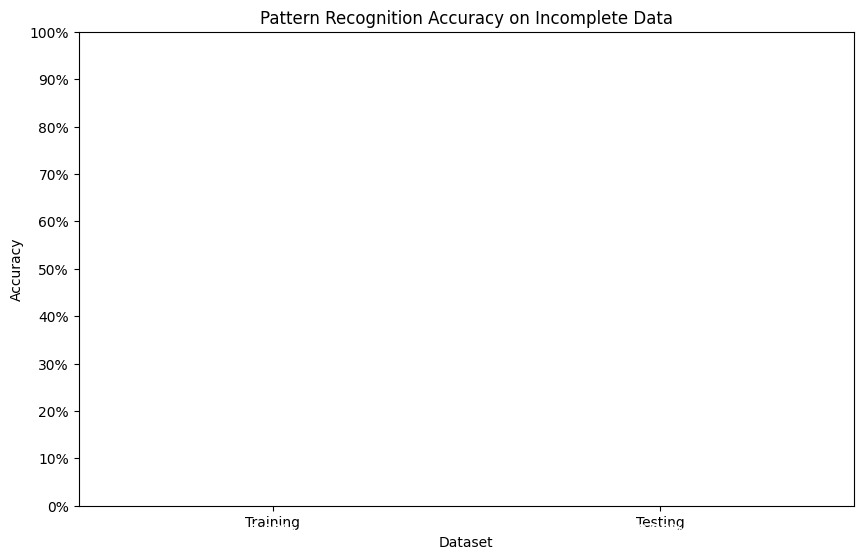

In [18]:
# Visualise pattern recognition results
def visualise_pattern_recognition_results(train_df, test_df):
    
    """
    Visualise the results of pattern recognition on incomplete data.
    
    Args:
    - train_df (pd.DataFrame): DataFrame containing training data results with 'match' column.
    - test_df (pd.DataFrame): DataFrame containing testing data results with 'match' column.
    """
    
    # Calculate accuracy for training and testing data
    train_accuracy = train_df['match'].mean()
    test_accuracy = test_df['match'].mean()

    # Prepare data for visualization
    results = {
        'Dataset': ['Training', 'Testing'],
        'Accuracy': [train_accuracy, test_accuracy]
    }

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Dataset', y='Accuracy', data=results, palette='viridis', hue='Dataset', dodge=False, legend=False)

    # Add titles and labels
    plt.title('Pattern Recognition Accuracy on Incomplete Data')
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
    plt.yticks(ticks=[i*0.1 for i in range(11)], labels=[f'{i*10}%' for i in range(11)])

    # Display values inside the bars
    for i, v in enumerate(results['Accuracy']):
        ax.text(i, v - 0.05, f'{v:.2%}', ha='center', va='center', color='white', fontweight='bold')

    # Adjust layout to prevent clipping
    plt.subplots_adjust(top=0.9)

    plt.show()

# Visualise results for all losses
for loss, result in results.items():
    print(f"Results for {loss}:")
    print("\nTraining Data Results:")
    if 'mapped_opening' in result['train'].columns and 'match' in result['train'].columns:
        print(result['train'][['mapped_opening', 'predicted_opening', 'match']].head())
    else:
        print("Mapped or Match columns not found in the train result DataFrame")
    
    print("\nTesting Data Results:")
    if 'mapped_opening' in result['test'].columns and 'match' in result['test'].columns:
        print(result['test'][['mapped_opening', 'predicted_opening', 'match']].head())
    else:
        print("Mapped or Match columns not found in the test result DataFrame")
    
    # Call the visualisation function
    visualise_pattern_recognition_results(result['train'], result['test'])